# Preprocessing on the CT dataset

In [1]:
%matplotlib inline
import random
import os
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [3]:
# random seed
def set_seed(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
set_seed(2023)

# Load dataset

(512, 512, 301)


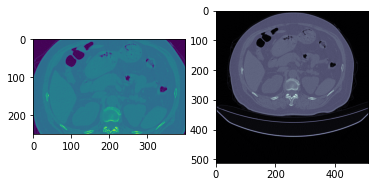

In [4]:
raw_data = pd.read_csv('../input/covid19-ct-scans/metadata.csv') #dataset path
# laod data
def read_nii(filepath):
    ct_scan = nib.load(filepath) # read path
    array   = ct_scan.get_fdata() # retrieve data
    array   = np.rot90(np.array(array)) # Rotate 90 degrees
    return(array)

sample_ct   = read_nii(raw_data.loc[0,'ct_scan'])
print(sample_ct.shape)
plt.subplot(121)
plt.imshow(sample_ct[50:300,50:450,0])
plt.subplot(122)
plt.imshow(sample_ct[...,0], cmap='bone')
sample = (sample_ct[50:100,50:100,0])

In [2]:
# lung thresholds
x1 = 125
# Set infection thresholds
x2 = 125

In [11]:
A = list()
B = list()
temp = np.empty((50, 50))
# Set the lung area
x_1 = [50, 150, 100, 80, 100, 50, 100, 70, 90, 90,
       100, 100, 50, 140, 120, 150, 150, 100, 100, 100]
x_2 = [300, 400, 350, 330, 350, 300, 350, 320, 340, 340,
       450, 450, 400, 490, 420, 500, 500, 400, 600, 500]
y_1 = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 100, 80, 80, 120, 100, 50, 50]
y_2 = [450, 450, 450, 450, 450, 450, 450, 450, 450, 450,
       600, 600, 600, 550, 580, 580, 520, 550, 600, 600]

In [12]:
def normalization(data):
    range = np.max(data) - np.min(data)
    return (data - np.min(data)) / range

In [13]:
C = 0
for m in range(0,20):
    sample_ct = read_nii(raw_data.loc[m,'ct_scan'])
    sample_mask = read_nii(raw_data.loc[m,'lung_and_infection_mask'])
    for i in range(0,int(sample_ct.shape[2]//3)):# 3d slcie
        i = i*3
        for j in range(0,int((x_2[m]-x_1[m]+1-50)/25)+1): 
            for k in range(0,int((y_2[m]-y_1[m]+1-50)/25)+1): 
                if(np.sum(sample_mask[x_1[m]+25*j:x_1[m]+50+25*j,y_1[m]+25*k:y_1[m]+50+25*k,i]!=0)>=x1):
                    temp = sample_mask[x_1[m]+25*j:x_1[m]+50+25*j,y_1[m]+25*k:y_1[m]+50+25*k,i]
                    temp1 = sample_ct[x_1[m]+25*j:x_1[m]+50+25*j,y_1[m]+25*k:y_1[m]+50+25*k,i]
                    if(np.sum(temp==3)>=x2):
                        A.append((normalization(temp1),1))
                    else:
                        B.append((normalization(temp1),0))
                    C = C+1

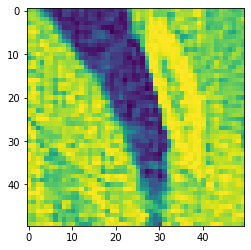

In [15]:
plt.imshow(temp1)

In [14]:
print(len(A))
print(len(B))
print(C)

15059
70666
85725


In [11]:
Train = list()
Test = list()
Train.extend(A[0:len(A)-1500])
Test.extend(A[len(A)-1500:len(A)])
Train.extend(B[0:len(B)-1500])
Test.extend(B[len(B)-1500:len(B)])
print(len(Train))
print(len(Test))

51703
3000


In [12]:
random.shuffle(Train)
random.shuffle(Test)
np.save("train.npy", Train)
np.save("test.npy", Test)

/home/tcs/anaconda3/envs/dgl66/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
